In [1]:
include("../src/mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [2]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, psi_complex)))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [3]:
function mps_and_contract(psi, bond_dim)
    A_mps = contract_mps(mps(psi, bond_dim))
    return abs(dot(A_mps, psi))
end

mps_and_contract (generic function with 1 method)

Float32[0.8670167, 0.8685571, 0.8708471, 0.87356234, 0.8773924, 0.88161343, 0.890976, 0.93210423, 0.9862299, 1.0000002, 1.0000002, 1.0000002, 1.0000002]

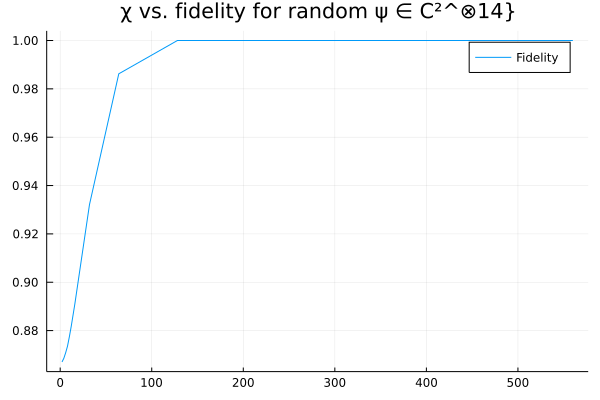

In [4]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims,
     complex_fidelities,
     title = "χ vs. fidelity for random ψ ∈ C²^⊗14}",
     label = "Fidelity")

[0.8656999401548396, 0.8661578463280615, 0.8668567869286555, 0.8678012405965931, 0.8687873225322635, 0.8700727655139331, 0.8736309640071975, 0.8911044763376712, 0.9321437139096117, 0.9865738319767605, 0.9999999999999969, 0.9999999999999969, 0.9999999999999969]

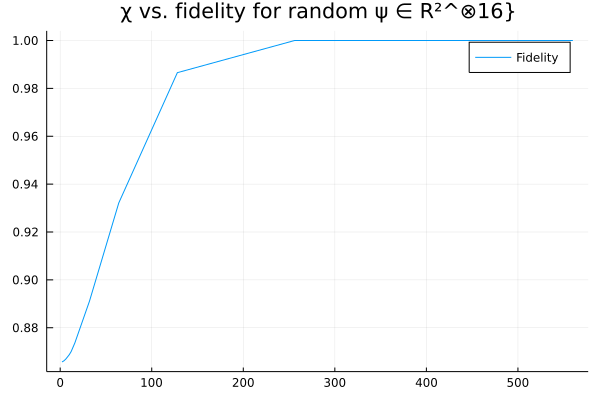

In [5]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims,
     real_fidelities,
     title = "χ vs. fidelity for random ψ ∈ R²^⊗16}",
     label = "Fidelity")